In [2]:
import scrying 
import numpy as np
import matplotlib.pyplot as plt 

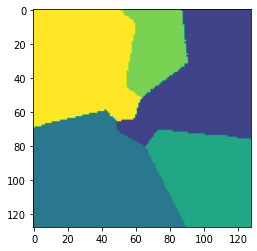

In [3]:
# setup the simulator and run with default settings 
simulator = scrying.Simulator()
simulator.run_simulation()

plt.imshow(simulator.get_image('final'),vmin=0,vmax=5)
plt.show()

# export the nucleation data from this simulation to a csv 
exported_data = simulator.export_nucleation_data(angle_unit = 'degrees')
np.savetxt('simulation.csv',exported_data,delimiter=',')

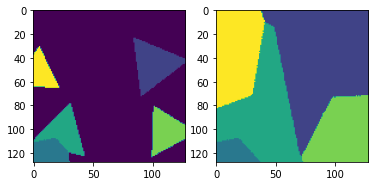

In [4]:
# setup the simulator and configure to capture an early-stage "snapshot" 
simulator = scrying.Simulator(random_seed=101)
simulator.change_settings(snapshot_mode = 'area', snapshot_area = 0.20)
simulator.run_simulation()

f, axarr = plt.subplots(1,2)
axarr[0].imshow(simulator.get_image('snapshot'),vmin=0,vmax=5)
axarr[1].imshow(simulator.get_image('final'),vmin=0,vmax=5)
plt.show()

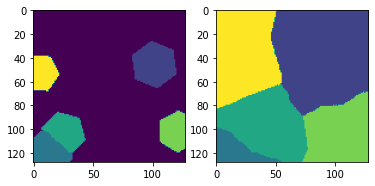

In [5]:
# run a simulation using hexagons instead of triangles
# any regular polygon can be achieved using only crystal_sides
simulator = scrying.Simulator(random_seed=101)
simulator.change_settings(crystal_sides=6)
simulator.change_settings(snapshot_mode = 'area', snapshot_area = 0.20)
simulator.run_simulation()

f, axarr = plt.subplots(1,2)
axarr[0].imshow(simulator.get_image('snapshot'),vmin=0,vmax=5)
axarr[1].imshow(simulator.get_image('final'),vmin=0,vmax=5)
plt.show()

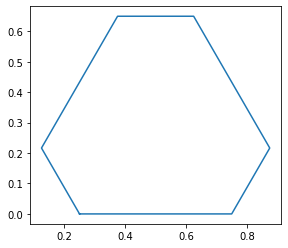

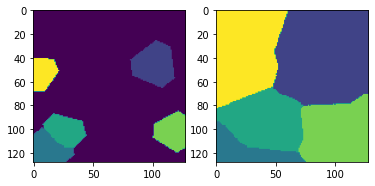

In [6]:
# run a simulation using a custom polygon (truncated triangle)
truncated_triangle_points = [(1/4,0),(3/4,0),(7/8,np.sqrt(3)/8),(5/8,3*np.sqrt(3)/8),(3/8,3*np.sqrt(3)/8),(1/8,np.sqrt(3)/8)]

# visualizing the shape
loop = truncated_triangle_points.copy()
loop.append(loop[0])
xs,ys = zip(*loop)

plt.plot(xs,ys)
plt.axis('scaled')
plt.show()

# running the simulation
simulator = scrying.Simulator(random_seed=101)
shape_array = scrying.get_shape_array(truncated_triangle_points)
simulator.change_settings(shape_array = shape_array)
simulator.change_settings(snapshot_mode = 'time',snapshot_time = 15)
simulator.run_simulation()

f, axarr = plt.subplots(1,2)
axarr[0].imshow(simulator.get_image('snapshot'),vmin=0,vmax=5)
axarr[1].imshow(simulator.get_image('final'),vmin=0,vmax=5)
plt.show()


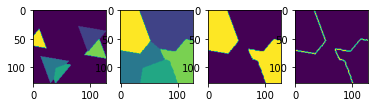

In [7]:
# run a simulation and analyze crystal structure and grain boundaries
simulator = scrying.Simulator(random_seed=101)
simulator.change_settings(snapshot_mode = 'area', snapshot_area = 0.20)
simulator.change_settings(orientation_mode = 'updown')
simulator.run_simulation()

f, axarr = plt.subplots(1,4)
final_img = simulator.get_image('final')
grain_structure = simulator.get_grain_structure(final_img, symmetry=3)

# left to right: early crystals, film, grain structure, grain boundaries
axarr[0].imshow(simulator.get_image('snapshot'),vmin=0,vmax=5)
axarr[1].imshow(final_img,vmin=0,vmax=5)
axarr[2].imshow(grain_structure)
axarr[3].imshow(simulator.get_grain_boundaries(grain_structure))
plt.show()

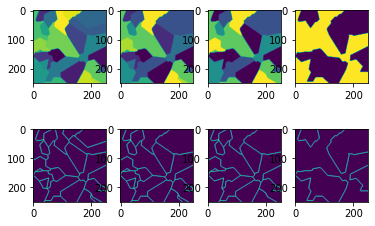

In [7]:
# demonstrating the effect of increasing the maximum misorientation between grains
simulator = scrying.Simulator(random_seed=3)
simulator.change_settings(snapshot_mode = 'area', snapshot_area = 0.20)
simulator.change_settings(orientation_mode = 'random')
simulator.change_settings(height = 250, width = 250, maximum_time=500)
simulator.change_settings(maximum_crystals = 25)
simulator.run_simulation()

f, axarr = plt.subplots(2,4)
final_img = simulator.get_image('final')
grain_structure_00 = simulator.get_grain_structure(final_img, symmetry=3)
grain_structure_10 = simulator.get_grain_structure(final_img, maximum_misorientation=10/360,symmetry=3)
grain_structure_20 = simulator.get_grain_structure(final_img,maximum_misorientation=20/360,symmetry=3)
grain_structure_30 = simulator.get_grain_structure(final_img,maximum_misorientation=30/360,symmetry=3)
grain_structure_60 = simulator.get_grain_structure(final_img,maximum_misorientation=60/360,symmetry=3)

# print(simulator._crystals)
# left to right: early crystals, film, grain structure, grain boundaries
axarr[0,0].imshow(grain_structure_00)
axarr[0,1].imshow(grain_structure_10)
axarr[0,2].imshow(grain_structure_30)
axarr[0,3].imshow(grain_structure_60)

axarr[1,0].imshow(simulator.get_grain_boundaries(grain_structure_00))
axarr[1,1].imshow(simulator.get_grain_boundaries(grain_structure_10))
axarr[1,2].imshow(simulator.get_grain_boundaries(grain_structure_30))
axarr[1,3].imshow(simulator.get_grain_boundaries(grain_structure_60))
plt.show()

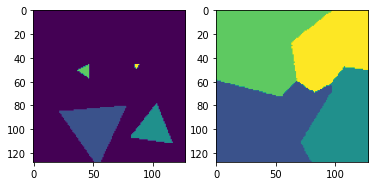

In [8]:
# run a simulation based off imported nucleation data 
simulator = scrying.Simulator()

# center_x, center_y, orientation [deg], nucleation_time
data = np.array([
    [100,99,98,6],
    [43,51,4,13],
    [86,47,40,15],
    [51,99,25,0]
                ])

simulator.import_nucleation_data(data, angle_unit = 'degrees', 
                                 has_index_column = False, autoconfigure_snapshot=True)
simulator.run_simulation(use_imported_data=True)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(simulator.get_image('snapshot'),vmin=0,vmax=4)
axarr[1].imshow(simulator.get_image('final'),vmin=0,vmax=4)
plt.show()

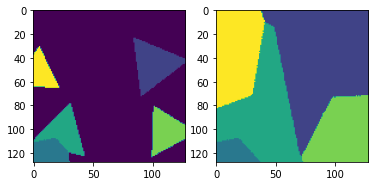

In [9]:
# save whole simulation as a 3d image (.tif or .gif)
import tifffile 
import array2gif

simulator = scrying.Simulator(random_seed=101)
simulator.change_settings(snapshot_mode = 'area', snapshot_area = 0.20)
simulator.run_simulation()

f, axarr = plt.subplots(1,2)
axarr[0].imshow(simulator.get_image('snapshot'),vmin=0,vmax=5)
axarr[1].imshow(simulator.get_image('final'),vmin=0,vmax=5)
plt.show()

image_evolution = simulator.get_image_evolution()

# .tif (for use within Fiji/ImageJ, etc.)  
tifffile.imwrite('simulation.tif',image_evolution)

# .gif (for animation purposes)
image_evolution_normalized = image_evolution * int(255.0/image_evolution.max())
image_gif = list(np.stack([np.transpose(image_evolution_normalized,(0, 2, 1))]*3,axis=3))
array2gif.write_gif(image_gif,'simulation.gif',fps=15)